## Chennapragada. V. S. S. Mani Saketh
## AP19110010348
## CSE - C
## ML Assignment 5

1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)]. Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

The actual Data : 
[[2, 1], [3, 4], [5, 0], [7, 6], [9, 2]]
The Covariance Matrix is : 
[[8.2 1.6]
 [1.6 5.8]]
The Eigenvalues are : 
[9. 5.]
The Eigenvectors are : 
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
The Transformed Data is : 
[[-3.57770876e+00 -2.22044605e-16]
 [-1.34164079e+00  2.23606798e+00]
 [-1.34164079e+00 -2.23606798e+00]
 [ 3.13049517e+00  2.23606798e+00]
 [ 3.13049517e+00 -2.23606798e+00]]
Scatter Plot for the actual Data : 


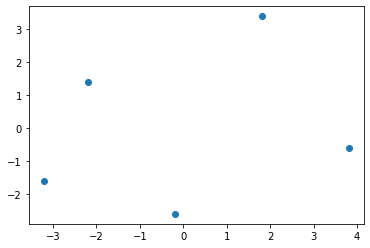

Scatter Plot for the Transformed Data : 


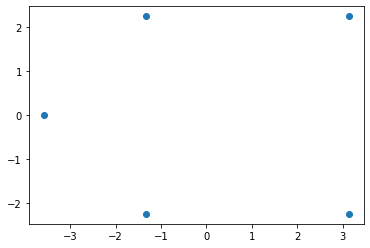

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
x = [[2, 1], [3, 4], [5, 0], [7, 6], [9, 2]]
print("The actual Data : ")
print(x)
sum1 = 0
sum2 = 0
for i in x:
    sum1 += i[0]
    sum2 += i[1]
m1 = sum1/5
m2 = sum2/5
for i in x:
    i[0] -= m1
    i[1] -= m2
x = np.array(x)
x_trans = np.transpose(x)
cov = (x_trans.dot(x))/4
print("The Covariance Matrix is : ")
print(cov)
eigenvalues, eigenvectors = eig(cov)
print("The Eigenvalues are : ")
print(eigenvalues)
print("The Eigenvectors are : ")
print(eigenvectors)
final  = x.dot(eigenvectors)
print("The Transformed Data is : ")
print(final)
import matplotlib.pyplot as plt

def scatter_plot(list):
    x = []
    y = []
    for i in list:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x,y)
    plt.show()
print("Scatter Plot for the actual Data : ")
scatter_plot(x)
print("Scatter Plot for the Transformed Data : ")
scatter_plot(final)

2. Implement Principal Component Analysis Algorithm and use it to reduce the dimensions of the Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different color codes for samples belonging to different classes.

The First 5 rows of the data : 
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Covariance Matrix : 
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000
The Eigenvalues are : 
[2.91849782 0.91403047 0.14675688 0.02071484]
The Eigenvectors are : 
[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.1421

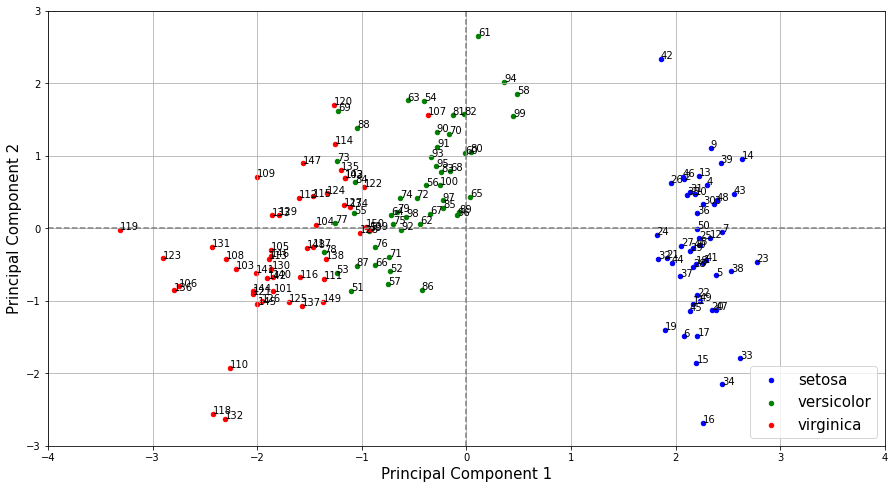

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("iris.csv")
print("The First 5 rows of the data : ")
print(df.head())
species = df["Species"].tolist()
X = df.drop("Species", 1)
X = (X - X.mean()) / X.std(ddof=0)
X_corr = (1 / 150) * X.T.dot(X)
print("Covariance Matrix : ")
print(X_corr)
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
print("The Eigenvalues are : ")
print(eig_values)
print("The Eigenvectors are : ")
print(eig_vectors)
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
print("The Required Scatter Plot : ")
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)